In [1]:
import pandas as pd
import dill
import numpy as np
import pickle
import matplotlib.pyplot as plt

# dill.dump_session('Ac23_4.pkl')
dill.load_session('Ac23_4.pkl')

In [28]:
# df_all = pd.ExcelFile('AC23-1-5.xlsx')
# df = pd.read_excel(df_all, 'Sheet4')
df = pd.read_excel('AC23-4.xlsx')
df.head()

,Part Number,SrNo,EPIC ID,Name,Gender,Age,Guardian Name,Relationship,Address,Others
0,AC0230004,1,RJN1991230,Mahesh Kumar,Male,43,Rati Ram,Father's,NaN,15/793
1,AC0230004,2,RJN1644268,Mohan Kumar Yadav,Male,33,Rajender Prasad Yadav,Father's,NaN,16/41-E
2,AC0230004,3,RJN1805951,Jitnder Kumar,Male,36,Ashish Kumar,Father's,NaN,16/147E
3,AC0230004,4,RJN1162544,Gaytri,Female,39,Rajesh Kumar,Husband's,NaN,16/164E
4,AC0230004,5,FMR0814566,Rajesh Kumar,Male,39,Om Prakash,Father's,NaN,16/164E


In [30]:
name = df['Name']
g_name = df['Guardian Name']
ln = []
gln = []
for i in range(len(df)):
    ln.append(name[i].split()[-1])
    gln.append(g_name[i].split()[-1])

In [32]:
uln = set(ln)
guln = set(gln)
# len(uln)
# len(guln)
# guln

In [62]:
NH = ['zalil', 'zabbar', 'sultan', 'shhabuddin', 'shersia', 'shameed', 'shah', 'shabir', 'rehman', 'rafiq', 'nizamuddin', 'naeem', 'murshid', 'mahmud', 
            'kalam', 'ishaq', 'imtiyaz', 'idrish', 'hussain', 'hosain', 'firoz', 'abdulaziz', 'ahmed', 'akbar', 'akhtar', 'ali', 'aluddin', 'ashrfi', 'ayub', 
             'aziz', 'zaki', 'zahoor', 'ansar', 'shahid', 'alam', 'mansoor', 'wazir', 'naseem', 'rehman', 'hussain', 'kashim'
     , 'zite', 'zende', 'warraich', 'quereshi', 'qazi', 'quazi', 'page', 'pagey', 'mushrif', 'khan', 'kazi', 'jawed', 'jazimuddin', 'hussainl', 'haasan','faasil', 'abraham']

alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# making sets of hindu and non-hindu

In [63]:
for i in range(len(NH)):
    NH[i] = NH[i].title()

guln.difference_update(set(NH))

In [64]:
# hinduS = pd.read_excel('Hindu Surnames.xlsx', 'Hindu')
hinduS =  pd.read_excel('HS.xlsx')
hinduS = set(hinduS['HinduN'])
hinduS = hinduS.union(guln)
len(hinduS)


2351

In [65]:
hinduS.difference_update(set(NH))
hinduS.difference_update(set(alphabet))
len(hinduS)

2348

In [66]:
# len(SurName)
hindu_SurName = pd.DataFrame(list(hinduS))
nonHindu_SurName = pd.DataFrame(NH)
# df.apply(lambda row: list(np.hstack((np.asarray(row.list1), np.asarray(row.list2)))), axis=1)

hindu_SurName.to_excel('hinduSurnamesUpdated.xlsx')
nonHindu_SurName.to_excel('Non-hinduSurname.xlsx')

In [72]:
df['last_guardian'] = gln
a = [""]*len(df)
for i in range(len(df)):
    if df['last_guardian'][i] in NH:
        a[i] = 'Non-Hindu'
    else:
        a[i] = 'Hindu'
        
df['Religion'] = a

In [39]:
hinduS = pd.read_excel('hinduSurnamesUpdated.xlsx')
NH = pd.read_excel('Non-hinduSurname.xlsx')

In [15]:
# [x for x in range(len(hindu))]
# df['religion'].isnull().sum()
# df[df['last_guardian'] == 'Wal']
# df['last_guardian'][1] == hindu[1]
# hindu[1]
# df

In [12]:
pickle_out = open('groupAgeWise.pickle', 'wb')
pickle.dump(group, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open('hinduS.pickle', 'rb')
hinduS = pickle.load(pickle_in)

In [10]:
# df.head()
# df[df['Religion'] == 'Non-Hindu']
# df
# hinduS
df.to_excel('after_applying_religion-4.xlsx')

# Question 5 below

In [8]:
labels = ['18-23', '23-28', '28-33', '33-38', '38-43', '43-48', '48-53', '53-58', '58-63', '63-68', 
          '68-73', '73-78', '78-83', '83-88', '88-93', '93-98']
bins = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88, 93, 98]
df["Age_group"] = pd.cut(df['Age'], bins, labels=labels)
# plt.hist(df1["age"], bins=8)
# df1.head(5)
# sns.countplot(df1['Age_group'], hue=df1['gen'])

In [11]:
# df.sort_values(by=['Age'], ascending=False)
group = df.groupby(['Gender', 'Age_group']).count()
count_ageWise = group['Part Number']
count_ageWise

Gender  Age_group
Female  19-24        44.0
        24-29        77.0
        29-34        79.0
        34-39        64.0
        39-44        50.0
        44-49        46.0
        49-54        47.0
        54-59        28.0
        59-64        14.0
        64-69        11.0
        69-74        16.0
        74-79        12.0
        79-84        10.0
        84-89         2.0
        89-94         NaN
        94-99         NaN
Male    19-24        59.0
        24-29        76.0
        29-34        73.0
        34-39        86.0
        39-44        49.0
        44-49        67.0
        49-54        50.0
        54-59        41.0
        59-64        20.0
        64-69        12.0
        69-74         8.0
        74-79         3.0
        79-84         1.0
        84-89         1.0
        89-94         NaN
        94-99         1.0
Name: Part Number, dtype: float64

In [139]:
# dill.dump_session("AC23.db")
# hinduS
# value_Count = df.groupby(['Others']).count()
# V_count = value_Count['Part Number']
V_count = df['Others'].value_counts
# V_count
# V_count']
# df['Others'] == V_count
# df['Others'].values.count


In [4]:
# df['EPIC ID'][3]
# df['EPIC ID']
# df1_all = pd.ExcelFile('AC23_1-5.xlsx')
df1 = pd.read_excel('xyz1.xlsx')
df1.head()


,Part Number,SrNo,EPIC ID,Name,Gender,Age,Guardian Name,Relationship,Address,Others,EPIC ID.1,EID,Age.1
0,AC0230003,126.0,RJN2041647,Guru Sharan Saha,Male,27.0,Faudar Saha,Father's,NaN,16/482,RJN,2041647.0,27.0
1,AC0230003,78.0,RJN2041176,Rohit Kumar,Male,19.0,Vinod Kumar,Father's,NaN,16/412,RJN,2041176.0,19.0
2,AC0230003,10.0,RJN2040996,Deepak Rana,Male,19.0,Om Prakash,Father's,NaN,16/2,RJN,2040996.0,19.0
3,AC0230003,144.0,RJN2039956,Monorara Khatun,Female,28.0,Md Bilal Ansari,Husband's,NaN,16/493,RJN,2039956.0,28.0
4,AC0230003,134.0,RJN2036077,Rajesh Kumar,Male,39.0,Ram Suresh,Father's,NaN,16/487-I,RJN,2036077.0,39.0


In [66]:
# df.iloc[:][11:]
# plt.scatter(df1['Age'], df1['Unnamed:11'])
# df
# from sklearn.preprocessing import StandardScaler

# features = ['EID', 'Age']

# # Separating out the features
# x = df1.loc[:, features].values

# # Standardizing the features
# x = StandardScaler().fit_transform(x)
# df1.sort_values(by = ['Age'])
df1 = df1.dropna(how='all', axis=1)
df1

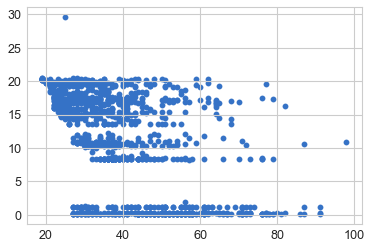

In [116]:
df1['EID1'] = df1['EID']*(0.00001)
plt.scatter(x=df1['Age'], y= df1['EID1'])
# df['EID1'] = df['EID']/10000 

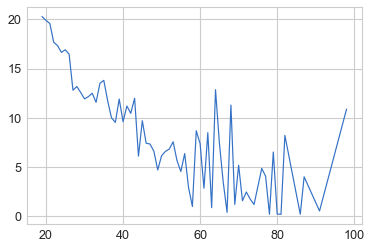

In [108]:
# x = df.iloc[:,11]

# Sx = x.cov().values
# Sx = sp.linalg.inv(Sx)

# mean = x.mean().values

# print('Mean :', mean)
# print('Inverce Covariance :\n ', Sx)
# df1.info()
# (df.groupby(['cluster', 'org'], as_index=False).mean()
#             .groupby('cluster')['time'].mean())

ageMean = df1.groupby(['Age'], as_index=False).mean().groupby('Age')['EID1'].mean()
# ageMean.index
plt.plot(ageMean.index, ageMean)
# ageMean

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
# print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

In [6]:
# plot([go.Scatter(x=ageMean.index, y=ageMean)])
iplot([{"x": ageMean.index, "y": ageMean}])


In [7]:
# ageM = df1.groupby(['Age'], as_index=False).median().groupby('Age')['EID1'].median()
# ageMean.index
# plt.plot(ageM.index, ageM)
# ageM
# plot([go.Scatter(x=ageM.index, y=ageM)])

In [111]:
# df.groupby(['Religion']).count()
print(78/1353, 186/1408, 127/1339, 51/1051, 140/1008)
# 78/1353, 186/1408, 1271339, 51/1051, 140/1008,

0.057649667405764965 0.13210227272727273 0.0948469006721434 0.048525214081826834 0.1388888888888889


In [11]:
group = df.groupby(['Age_group'])['Part Number'].count()
iplot([{"x": group.index, "y": group}])

In [9]:
# np.sum(group)
df[df['Age'] == 19]

,Part Number,SrNo,EPIC ID,Name,Gender,Age,Guardian Name,Relationship,Address,Others,last_guardian,Religion,Age_group
61,AC0230004,62,RJN2038189,Ritu Bakolia,Female,19,Roshan Lal,Father's,NaN,16/785,Lal,Hindu,18-23
67,AC0230004,68,RJN2040657,Saddam Hussain,Male,19,Md Ayub,Father's,NaN,16/794,Ayub,Non-Hindu,18-23
100,AC0230004,101,RJN2031433,Preeti,Female,19,Kishan Lal,Father's,NaN,16/841,Lal,Hindu,18-23
102,AC0230004,103,RJN2041119,Rahul,Male,19,Pappu,Father's,NaN,16/844,Pappu,Hindu,18-23
